<a href="https://colab.research.google.com/github/eddes/buildingphysics/blob/feature%2Fpipenv_and_notebooks/notebooks/chapter_1/Euler_and_CN_schemes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stability for Euler’s explicit and  Crank-Nicolson’ schemes**
## Building Physics - Applications in python - Chapter 1

The notebook present examples of numerical integration methods for partial differential equations. The objective here is to integrate a 1D heat equation 
$ \frac{\partial T}{\partial t}
   = \alpha \frac{\partial^2 T}{\partial x^2} $. The media will be considered homogeneous.
  
  

In [0]:
# Importing dependencies for calculus and plots
import numpy as np
import matplotlib.pyplot as plt
from  scipy.optimize import fsolve

# Widget to create interactive graphs
from ipywidgets import  interact_manual
import ipywidgets as widgets
# Fixing figures plot size
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

### Euler explicit scheme - vector
**Book reference page 11** 

We define `n` as the amount of nodes we split the media into, `T` an array of size `n`, representing the temperature for each node at time `t`, `T_plus` an array of size `n`, representing the temperature for each node at time `t + dt`.

`L` is the length of the media (supposed of dimension 1 here). `dt` is the elementary time step of the simulation (s), for a total simulation time of `sim_time` (s)

We introduce Fourier’s non-dimensional number Fo = $ \alpha \frac{ \Delta T}{\Delta x^2} $
 the ratio of conduction heat transfer to thermal storage in the material slice.

By default in this example, the media starts with a homogenous temperature of 0°C. At the start of the simulation, the left border of the media is set to 10°C as a boundary condition.


Let's define some variables

In [0]:
# The media is discretized in a 1D mesh of n units 
n=100

# Initializing array storing temperature values for T + dt
T_plus=np.zeros(n)
# Initializing storing temperatures values for T
T=np.zeros(n)

# Time variable (s)
t=0
#Duration of the simulation (s)
sim_time=600
# Time step of the simulation
dt=1

# The length of the media
L=0.1 # m
# thermal diffusivity coefficient
alpha=1e-7 #m2/s

# The length of space unit
dx=L/n # 


The Fourier coefficient is defined as

In [0]:
Fo=alpha*dt/dx**2

As per 2.1 in the book, the heat equation can be transformed as (1.12) :

$ {T_{i}}^+ = T_i (1-2 F_0)+ F_0 \times (T_{i+1} +T_{i-1})  $

For each timestep, the temperature evolution in node i can be computed as : 



In [0]:
for i in range(1,n-1):
    T_plus[i]=T[i]*(1-2*Fo)+Fo*(T[i+1]+T[i-1])

The equation (1.12) is stable for $(1-2 F_0) > 0 $

Let's run the simulation a first time. In this case, `Fo = 0.1`, respecting the stability criteria of Fo < 0.5.


Fo = 0.1


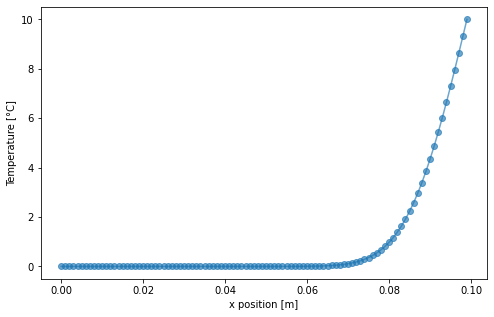

In [9]:
# Initializing array storing temperature values for T + dt
T_plus=np.zeros(n)
# Initializing storing temperatures values for T
T=np.zeros(n)

t = 0

# Calculating Fo
Fo=alpha*dt/dx**2
print("Fo = {}".format(Fo))

# Assert if Fo respects the stability criteria
if Fo>0.5:
    print("stability issue")

# Running the simulation for t in [0, sim_time]
while t < sim_time:
    # Initializing boundary conditions (these temperatures are fixed during the simulation)
    T[0]=0
    T[n-1]=10
    # Updating each node as per equation (1.12) 
    for i in range(1,n-1):
        T_plus[i]=T[i]*(1-2*Fo)+Fo*(T[i+1]+T[i-1])
    
    # T becomes T+
    T=T_plus # replace 
    # Updating to next time step
    t+=dt

# The T array is displayed at the end of the simulation
x_pos=np.arange(0,L,dx)
plt.xlabel("x position [m]")
plt.ylabel("Temperature [°C]")
plt.plot(x_pos, T_plus, 'o-', alpha=0.65)


Let's now plot the same simulation with a different value of Fo. The interactive plot allows you to pick a value then run the simulation. Click on the **Run Interact** button to start the simulation and display the resulting graph.

In [21]:
# Defining the simulation as a method with dt as an argument.

def plot_temperature_evolution(dt):
  n=100
  alpha=1e-6
  Fo=alpha*dt/dx**2
  T_plus=np.zeros(n)
  T=np.zeros(n)
  t=0
  sim_time=60
  while t < sim_time:
    T[0]=0
    T[n-1]=200
    for i in range(1,n-1):
      T_plus[i]=T[i]*(1-2*Fo)+Fo*(T[i+1]+T[i-1])
    T=T_plus 
    t+=dt
	
  x_pos=np.arange(0,L,dx)
  plt.xlabel("x position [m]")
  plt.ylabel("Temperature [°C]")
  plt.plot(x_pos, T_plus, 'o-', alpha=0.65)

# Creating an interactive graph based on IPython Widgets
interact_manual(plot_temperature_evolution, dt = widgets.FloatSlider(value=0.2,min=0,max=2,step=0.1))

interactive(children=(FloatSlider(value=0.2, description='dt', max=2.0), Button(description='Run Interact', st…

<function __main__.plot_temperature_evolution>

The instability can be seen for $\Delta t$ values near 1, as a discontinuity in the temperature distribution appears, followed by intense divergence of the results on the right hand side of the domain.

### Euler explicit scheme - matrix
**Book reference page 12** 

Same exemple, yet described with a matrix implementation. The instability can be clearly seen for `dt > 1.84`, which is the stability limit of the explicit scheme in the this case.

In [26]:
# Defining the simulation as a method with Fo as an argument.

def plot_temperature_evolution_matrix(dt):
    
    t=0
    sim_time=600
    
    n=50+2 # number of nodes
    L=0.1 # m
    dx = L/n
    alpha=1e-6
    Fo=alpha*dt/dx**2

    # Defining the matrix as per (1.13)
    K=np.eye(n,n,k=-1)*1 + np.eye(n,n)*-2 + np.eye(n,n,k=1)*1

    K[0,0]=0
    K[0,1]=0
    K[-1,-1]=0
    K[-1,-2]=0

    # Initializing array storing temperature values for T + dt
    T_plus=np.zeros(n)
    # Initializing storing temperatures values for T
    T=np.zeros(n)

    # Starting simulation 
    while t < sim_time:
            
        T[0]=0
        T[n-1]=10

        # matrix multiplicatio K*T as per (1.13)
        T_plus=Fo*np.dot(K,T) + T

        # T becomes T+
        T=T_plus # replace 
        # Updating to next time step
        t+=dt
    
    #Plotting results
    x_pos=np.arange(0,L,dx)
    plt.xlabel("x position [m]")
    plt.ylabel("Temperature [°C]")
    plt.plot(x_pos, T_plus, 'o-', alpha=0.65)


# Creating an interactive graph based on IPython Widgets
interact_manual(plot_temperature_evolution_matrix, dt = widgets.FloatSlider(value=1.5,    min=0,
                                                max=3,
                                                step=0.05))

interactive(children=(FloatSlider(value=1.5, description='dt', max=3.0), Button(description='Run Interact', st…

<function __main__.plot_temperature_evolution_matrix>

### Crank-Nicolson scheme 
**Book reference page 16** 

Euler’s explicit scheme has the advantage of simplicity and straightforward implementation. However, its stability conditions are often detrimental to execution time. A way to increase its stability is to change the explicit numerical scheme for an implicit scheme. As per (1.32), the integration scheme can be generalized as 

$ [T^+] = [T] + (1 - \beta) \times [K][T] + \beta \times [K][T] $

with $\beta$ called "relaxation factor". Crank-Nicolson being a particular form of this scheme for $ \beta = 0.5 $. We define this scheme in the following methods:

In [0]:
# function for Crank-Nicolson's scheme
def fc_CN(T_plus,T,K,beta):
    return  T_plus - T - beta*np.dot(K,T) - beta*np.dot(K,T_plus)

Let's apply this scheme with two different materials. The media has 3/4 of his length in material 1, 1/4 of his length in material 2.


In [29]:
# Relaxation factor
beta=0.5
# Solid nodes 
n_solid=19
# Total nodes
n=n_solid+2

# Init time
t=0
# Simulation time
hours=4
sim_time=hours*3600
# Time step
dt=50

# Length of the media
L_tot=0.9 # m
# Node length
dx=L_tot/(n_solid) # m


# x discretization of the media
x_pos=np.arange(0,L_tot+2*dx,dx)
#Definition of the layer of material 1
L_layer1= 3*L_tot/4 + 0.003 # add epsilon to avoid falling straight on a node

# for the interface property
# Location of the material interface
x_interface=L_tot-L_layer1
# Node number in which falls the interface
i_interface=int(x_interface/dx)



Tmin=-5
Tmax=20
T_init=Tmin #0.5*(Tmin+Tmax)
T=np.ones(n)*T_init
T[0]=Tmin
T[n-1]=Tmax

print("L_tot={}, L_layer1={},x_interace={},i_interace={}".format(L_tot,L_layer1, x_interface, i_interface))

L_tot=0.9, L_layer1=0.678,x_interace=0.22199999999999998,i_interace=4


The media properties and the interface localisation are described below

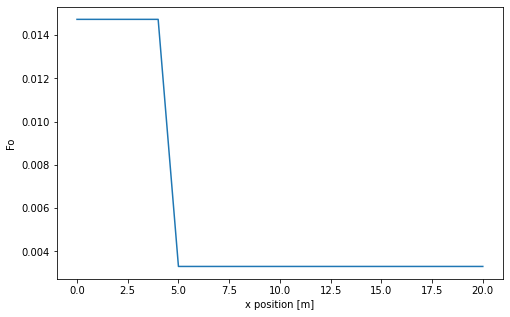

In [30]:

# material 1 and 2 (1 = on the side of i=0)
lambda1,rho1,Cp1 =1.6,2200,1100 # 8.1*1e-7
lambda2,rho2,Cp2 =  0.04,300,900 # 1.2*1e-7

alpha1 = lambda1/(rho1*Cp1)
alpha2 = lambda2/(rho2*Cp2)

# fourier for both layers
Fo1=alpha1*dt/dx**2
Fo2=alpha2*dt/dx**2

# fourier-biot
hi=7.7 # W/m2/K heat transfer side i
FoBi_i=dt/(dx*rho1*Cp1)*np.power((1/hi+dx/lambda1/2),-1)
he=25 # W/m2/K heat transfer side e
FoBi_e=dt/(dx*rho2*Cp1)*np.power((1/he+dx/lambda2/2),-1)


Fo=np.zeros(n)


dx1=max(i_interface*dx-x_interface,x_interface-i_interface*dx)
dx2=dx-dx1


# lambda_eq at the interface
k_eq=1/(dx1/lambda1+dx2/lambda2)
# Fo_eq
Fo_eq=dt*k_eq/(rho1*Cp1*dx**2)

# let's build the conductivity matrix
K=np.eye(n,n,k=-1)*1 + np.eye(n,n)*-2+ np.eye(n,n,k=1)*1
K[0,0],K[0,1],K[-1,-1],K[-1,-2]=0,0,0,0 # ghost lines for BC

coeffs_Fo=np.ones(len(T))
coeffs_Fo[0:i_interface+1]=Fo1 # prepare the upper part of the matrix
coeffs_Fo[i_interface+1:]=Fo2 # ... the lower part of the matrix


K=coeffs_Fo*K
# diagonal terms around interface
K[i_interface,i_interface]=-(Fo1+Fo_eq)
K[i_interface+1,i_interface+1]=-(Fo2+Fo_eq)
# sub and supra diag terms around interface
K[i_interface,i_interface+1]=Fo_eq
K[i_interface+1,i_interface]=Fo_eq
# exchange with air
K[1,0]=FoBi_i
K[1,1]=-FoBi_i-Fo1
# exchange with air
K[-2,-1]=FoBi_e
K[-2,-2]=-FoBi_e-Fo2

plt.xlabel("x position [m]")
plt.ylabel("Fo ")
plt.plot(coeffs_Fo)

Interactive plot of CN scheme

In [31]:
def run_simulation_CN(dt):
  Tmin=-5
  Tmax=20
  T_init=Tmin #0.5*(Tmin+Tmax)
  T=np.ones(n)*T_init
  T[0]=Tmax
  
  T[n-1]=Tmin
  t=0
  while t < sim_time:
    T_plus = fsolve(fc_CN, T, args=(T,K,beta))
    T = T_plus
    t+=dt

  plt.xlabel("x position [m]")
  plt.ylabel("Temperature [°C]")
  plt.plot(x_pos, T, 'o-', alpha=0.65,label='crank-nicolson')
  plt.legend()
  plt.arrow(L_tot-L_layer1,Tmin,0,abs(Tmax-Tmin))

# Creating an interactive graph based on IPython Widgets
interact_manual(run_simulation_CN, dt = widgets.FloatSlider(value=20,    min=0,
                                                max=200,
                                                step=1))

interactive(children=(FloatSlider(value=20.0, description='dt', max=200.0, step=1.0), Button(description='Run …

<function __main__.run_simulation_CN>